<a href="https://colab.research.google.com/github/zaranasavani/MyLearning/blob/main/house_price_prediction(LinearRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **House Price Prediction Using Linear Regression**

### **Load Data**

In [4]:
import pandas as pd
df = pd.read_csv('house_price.csv')
df

,area,price
0,2600,489000
1,3000,523000
2,3200,560000
3,3500,596000
4,3800,638000


### **Build Model**

In [6]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(df[['area']],df.price)

LinearRegression()

### **Predict One Value**

In [7]:
model.predict([[2500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([469943.39622642])

In [8]:
m=model.coef_
print(m)

[126.74528302]


In [9]:
b=model.intercept_
print(b)

153080.18867924507


In [10]:
y = m*2900 + b
print(y)

[520641.50943396]


### **Predict Values of given areas by train model**

In [12]:
areadf = pd.read_csv('areas.csv')
areadf.head(5)

,area
0,2650
1,2689
2,2700
3,2740
4,2790


In [13]:
p = model.predict(areadf[['area']].values)
areadf['price'] = p
areadf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,area,price
0,2650,488955.188679
1,2689,493898.254717
2,2700,495292.452830
3,2740,500362.264151
4,2790,506699.528302
5,2890,519374.056604
6,2900,520641.509434
7,2950,526978.773585
8,3050,539653.301887
9,3090,544723.113208


In [14]:
areadf.to_csv('areas.csv',index=False)

In [15]:
import pickle
with open('home_value_prediction_model','wb') as f:
  pickle.dump(model,f)

In [16]:
with open('home_value_prediction_model','rb') as f:
  md = pickle.load(f)

md.predict([[2500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([469943.39622642])

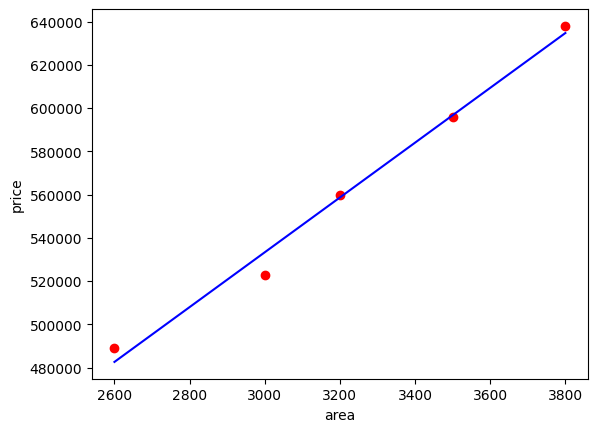

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price, color='red')
plt.plot(df.area,model.predict(df[['area']]), color='blue')